# Prompt Testing for Single Agent System

This file is used to evaluate what the best LLM is to be used for the single agent system. 

For this, we use the same prompt for the single agent, and evaluate the responses accuracy, quality and processing time. 

Then the best model is used for prompt engineering.

Software Lab 2025 Group 25

File made by: Eduardo Silva (03805057)
eduardo.silva@tum.de

Documentation made by: Eduardo Silva (03805057)

# 1) Prompts For Only 1 Agent

For the Single Agent we only use 1 prompt, meaning that the agent is responsible for all the tasks:

* Reading the user query
* Understanding what is asked
* Process the inputs and use them with the tools available 
* Respond with the correct output in natural language

Since the goal is to only understand what LLM is better suited for our application (Tool usage), we select a neutral prompt woth few indication of what should be done. With this, we can evaluate response time and accuracy to select the best LLM.

In [2]:
SINGLE_PROMPT = "You are a helpful assistant. \
            You have access to special tools for estimating drill wear and evaluating drilling quality. \
            However, you should only use these tools if the user explicitly \
            asks you to perform a calculation for drill wear or drilling quality. \
            If the user asks general questions or greets you, respond directly without using any tools. \
            Additionally, if the user does not provide the required parameters for tool calculations, \
            inform them that the values are missing and ask for them. \
            If the user omits the drill bit material for the drilling quality, tell them that you can only perform the BEF criteria \
            and that you need the drill bit material for CCF criteria. \
            Assume default values if necessary and clarify the units being used. \
            Please the result should just be a string of a list with the numbers or criteria inside. \
            Respect the following format: \
               For Wear tool the return should be str([float, float, float]). Example: '[8.0, 1.0, 2.0]' \
               For Quality tool the return should be str([str, str]). Exmaple: '[Good, Bad]'"


# 2) User Queries by Difficult

Batch of queries to be used to test the LLM. The queries are subdivided into three different categories: Easy, Medium and Hard. 

For efficiency, hard questions are left out for the LLM selection, since we assume that LLMs that do better at Easy and Medium will also do better at Hard questions. 

This batch of queries will also be used for the prompt engineering folder.

In [ ]:
user_queries = {

    # EASY: These queries are straightforward, with correct values and units for material, feed rate, cutting speed, and cooling. No ambiguity in the input, designed to test if the system can handle perfectly structured queries.
    "EASY": [
        ("I want to estimate the wear of my model. I am going to use the material 'P' and I want to have a feed rate value of 0.2 and cutting speed of 100."), 
        ("Can you help me evaluate the quality of my drilling process? I am using cooling of 12.5, feed rate of 0.13, and cutting speed of 16.7."), 
        ("Please estimate the wear for material 'N' with a feed rate of 0.3 and a cutting speed of 120.")
    ],
    # MEDIUM: These scenarios involve:
        # Unit conversion: The feed rate and cutting speed values are given in non-SI units (meters per minute, inches per minute). 
        # The LLM needs to convert these to the standard units used in the system (SI).

        # Missing values: Some queries are missing parameters (e.g., feed rate or cutting speed), and the LLM has to either ask for the missing values or use defaults.
    "MEDIUM": [
        ("I want to estimate the wear of my model using material 'K', feed rate of 0.25 (in meters per minute), and cutting speed of 100 (in mm/min)."),  # Unit conversion test
        ("Can you calculate the drilling quality for cooling 10.5, feed rate 0.2 (in inches/min), and cutting speed 10 (in inches/min)?"),  # Unit conversion test
        ("I want to evaluate my drilling quality with feed rate 0.15 and cutting speed 75, but I forgot to mention the cooling value. Could you assume cooling 15?"),  # Missing parameter, assume default
        ("Estimate wear for material 'P'. I provided the cutting speed 100, but I forgot the feed rate. Can you assume a default of 0.2?"),  # Missing parameter, assume default
        
    ],

    # Hard questions not used for LLM Choice to make evaluation faster
}



# 3) Import Correct Answers

Import the JSON file that contains the direct output from the tools by using the user's inputs. 
This will be used to compare with the results from the LLM. 

At the moment this verification is done manually, since the output from the LLM is natural language.

In [ ]:
import json

# load correct answers
with open("correct_answers.json", "r") as f:
    CorrectAnswers = json.load(f)

print(CorrectAnswers)

{'EASY': ['[81.9, 15.4, 2.7]', '[Bad, Good]', '[77.9, 18.7, 3.4]'], 'MEDIUM': ['[85.6, 12.3, 2.1]', '[Good, Good]', '[Good, Good]', '[81.9, 15.4, 2.7]']}


# 4) Create The List of LLMs to be tested and used

We created a list from the Ollama library containing instances of LLMs. It is important for the user to have ollama installed in his environment, since the models are pulled from this library. More information regarding Ollama is availlable in the README file inside the home folder.

In [ ]:
# INSTALL NEW LLMS

import subprocess

# getting the llms that work given RAM constraints
# these can be changed to accomodate any other LLMs
llama_names = [
    "llama3.2", 
    "smollm2:1.7b",
    "granite3.3:2b",
    "qwen3:1.7b",
    "qwen2.5:1.5b",
    "qwen2.5:3b",
    "nemotron-mini:4b"
]


# uncomment for installing the LLMs for the first time
"""for model in llama_names:
    subprocess.run(["ollama", "pull", model])"""


'for model in llama_names:\n    subprocess.run(["ollama", "pull", model])'

In [ ]:
from langchain_ollama import ChatOllama

LLMS = []

# create LangChain instances of the LLMs
for name in llama_names:
    llm = ChatOllama(
    model=name,
    temperature=0.2,
    )

    LLMS.append(llm)

print(LLMS)

['llama3.2', 'smollm2:1.7b', 'granite3.3:2b', 'qwen3:1.7b', 'qwen2.5:1.5b', 'qwen2.5:3b', 'nemotron-mini:4b']
[ChatOllama(model='llama3.2', temperature=0.2), ChatOllama(model='smollm2:1.7b', temperature=0.2), ChatOllama(model='granite3.3:2b', temperature=0.2), ChatOllama(model='qwen3:1.7b', temperature=0.2), ChatOllama(model='qwen2.5:1.5b', temperature=0.2), ChatOllama(model='qwen2.5:3b', temperature=0.2), ChatOllama(model='nemotron-mini:4b', temperature=0.2)]


# 5) Run Code

This is the part where by using the LLMs instances created from Ollama, together with the user queries, we get the responses from the system. 

In [7]:
# True to see the logic behind the LLM
# False to just get final response

DETAILED_RESPONSES = False

In [ ]:
## DO NOT CHANGE ANYTHING


from langchain_ollama import ChatOllama
from langchain_ollama.llms import OllamaLLM
from Tools_LLM import get_wear, get_quality
from langchain.agents import create_agent
import time
from langchain_core.messages.ai import AIMessage

print(type(AIMessage))

time_elapsed = {}

LLMS_RESPONSES = {}

# create dictionary for LLMs responses
for name in LLMS:
    LLMS_RESPONSES[str(name)] = []

#iterate over LLMs
for llm in LLMS:
 
    agent = create_agent(llm, tools=[get_wear, get_quality], system_prompt=SINGLE_PROMPT)

    responses_times = []

    # iterate over level of queries
    for level in user_queries.keys():

        start_time = time.time()

        #start_time = time.time()
        #iterate over user queries
        print("Level of Query: ", level)
        for query in user_queries[level]:

            print("-----------###########3-----------")

            if DETAILED_RESPONSES == True:
                #get the response from the AGENT with all informationa about Tool calls
                for step in agent.stream({"messages": [{"role": "user", "content": query}]}):
                    for update in step.values():
                        for message in update.get("messages", []):
                            message.pretty_print()

            else:
                final_response = agent.invoke({
                    "messages": [{"role": "user", "content": query}]
                })
                

                # Extract AI's response
                ai_response = None
                for message in final_response['messages']:
                    if "AIMessage" in str(type(message)):  # Check if the message is from the AI
                        ai_response = message.content

                if ai_response:
                    print(ai_response)  # Print only the AI's response
                else:
                    print("No AI response found.")  # Handle case if AI message is not found
                
                LLMS_RESPONSES[str(llm)].append(ai_response)


        end_time = time.time()
        duration = end_time - start_time
        print("Duration: ", duration)
        responses_times.append(duration)

    time_elapsed[str(llm)] = responses_times

        

<class 'pydantic._internal._model_construction.ModelMetaclass'>
Level of Query:  EASY
-----------###########3-----------
The estimated wear of your drill bit is as follows:

[81.9, 15.4, 2.7]

This indicates that the probability of safe drilling is approximately 81.9%, warning is 15.4%, and failure is 2.7%.
-----------###########3-----------
['Bad', 'Good']
-----------###########3-----------
The estimated wear for material 'N' with a feed rate of 0.3 and a cutting speed of 120 is:

[77.9, 18.7, 3.4]
Duration:  71.98930764198303
Level of Query:  MEDIUM
-----------###########3-----------
The estimated wear of your drill bit is as follows:

[90.3, 9.1, 0.6]

Please note that these probabilities are based on the Wear tool and represent the likelihood of safe, warning, and fail conditions, respectively. If you'd like to know more about the drilling quality, I can also provide you with a separate assessment using the Quality tool.
-----------###########3-----------
['Bad', 'Good']
----------

# 6) Evaluation of Responses

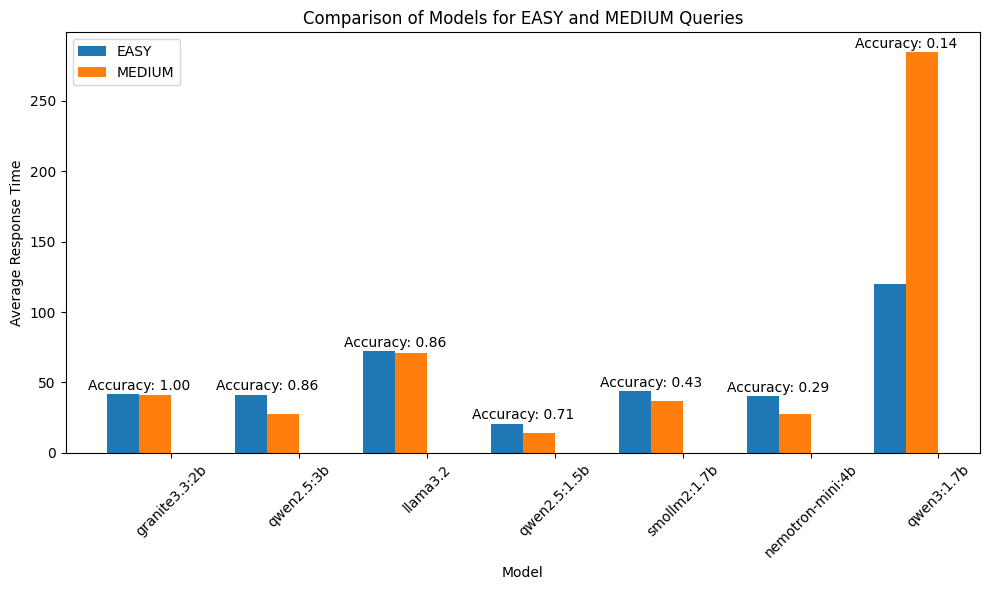

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = time_elapsed  # Assuming `time_elapsed` has the same structure as before
acc = {
    "llama3.2": 6.0 / 7.0,
    "smollm2:1.7b": 3.0 / 7.0,
    "granite3.3:2b": 7.0 / 7.0,
    "qwen3:1.7b": 1.0 / 7.0,
    "qwen2.5:1.5b": 5.0 / 7.0,
    "qwen2.5:3b": 6.0 / 7.0,
    "nemotron-mini:4b": 2.0 / 7.0,
}  # accuracy values, these need to be evaluated manually, by checking if the values correspond to the ones in the correct_answers.json

# Process the data
models = list(data.keys())
values = np.array(list(data.values()))  # List of values for each model
easy_values = values[:, 0]  # First value of each list (EASY)
medium_values = values[:, 1]  # Second value of each list (MEDIUM)

# Get model names without "model="
model_names = [key.split('=')[1].split(' ')[0].replace("'", "") for key in data.keys()]

# Match model names with accuracy values
accuracies = [acc[model] for model in model_names]  # Get the corresponding accuracy for each model

# Sort models by accuracy
sorted_indices = np.argsort(accuracies)[::-1]  # Sort in descending order
sorted_model_names = np.array(model_names)[sorted_indices]
sorted_easy_values = easy_values[sorted_indices]
sorted_medium_values = medium_values[sorted_indices]
sorted_accuracies = np.array(accuracies)[sorted_indices]

# Create positions for the bars on the x-axis
x = np.arange(len(sorted_model_names))

# Bar width
bar_width = 0.25

# Plot the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot EASY values
bars1 = ax.bar(x - bar_width, sorted_easy_values, bar_width, label='EASY')

# Plot MEDIUM values
bars2 = ax.bar(x, sorted_medium_values, bar_width, label='MEDIUM')

# Labeling
ax.set_xlabel('Model')
ax.set_ylabel('Average Response Time')
ax.set_title('Comparison of Models for EASY and MEDIUM Queries')

# Set custom tick labels for x-axis ("EASY" and "MEDIUM")
ax.set_xticks(x)
ax.set_xticklabels(sorted_model_names)  # We use sorted model names as labels

# Add labels for "EASY" and "MEDIUM" at the group level
ax.set_xticks(x + bar_width / 2)  # Adjusting the position of x-ticks
ax.set_xticklabels(sorted_model_names, rotation=45)

# Add a legend
ax.legend()

# Add accuracy annotations in the middle between the two bars for each model
for i, model in enumerate(sorted_model_names):
    accuracy = sorted_accuracies[i]
    # Get the x-position in the middle of the two bars
    x_position = x[i] + bar_width / 2
    ax.text(x_position - bar_width, max(sorted_easy_values[i], sorted_medium_values[i]) + 1,  # Place the text above the taller bar
            f'Accuracy: {accuracy:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Add the arrow pointing to the left with the accuracy label
ax.annotate('Accuracy', xy=(0.5, 1.05), xytext=(0.25, 1.15),
            arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),
            ha='center', va='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Result Analysis

Given the plot above we select the LLM granite3.3:2b since it shows the better accuracy while also being fast at responding the user queries.